In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from tqdm import tqdm_notebook

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

import torch

In [ ]:
from wordcloud import WordCloud

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from googletrans import Translator

translator = Translator()

def translate_to_korean(word):
    translation = translator.translate(word, dest='ko')
    return translation.text

In [ ]:
df = pd.read_pickle('../dataset/gaogal3.p')
df.head()

,review,label
0,"As a big fun of Guardian franchise, I have to ...",0
1,I loved the first film. The second was not qui...,0
2,"I get the idea, but the extreme violence to an...",0
3,I'm a huge Marvel fan and still cannot underst...,0
4,What a dreadful dogs dinner of a movie this wa...,0


In [ ]:
bad_reviews = df['review'][df['label']=='0'].to_list()
good_reviews = df['review'][df['label']=='1'].to_list()

In [ ]:
len(bad_reviews), len(good_reviews)

(44, 50)

In [ ]:
def remove_stopwords(sentence):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(sentence)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    filtered_sentence = ' '.join(filtered_tokens)
    return filtered_sentence

for i in tqdm_notebook(range(len(bad_reviews))):
    bad_reviews[i] = remove_stopwords(bad_reviews[i])


for i in tqdm_notebook(range(len(good_reviews))):
    good_reviews[i] = remove_stopwords(good_reviews[i])

/tmp/ipykernel_19434/461129623.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(bad_reviews))):


  0%|          | 0/44 [00:00<?, ?it/s]

/tmp/ipykernel_19434/461129623.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(good_reviews))):


  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
bad_review_data = ''
for br in bad_reviews:
    bad_review_data = bad_review_data + ' ' + br

good_review_data = ''
for gr in good_reviews:
    good_review_data = good_review_data + ' ' + gr

In [ ]:
docs = [bad_review_data, good_review_data]

In [ ]:
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def calculate_tfidf_weights(corpus):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names_out()

    weights = []
    for row in tfidf_matrix:
        row_weights = {}
        for col, value in zip(row.indices, row.data):
            feature_name = feature_names[col]
            row_weights[feature_name] = value
        weights.append(row_weights)

    return weights

In [ ]:
corpus = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]

weights = calculate_tfidf_weights(docs)

bad_word_score = {

}

good_word_score = {

}
for i, doc_weights in enumerate(weights):
    if i==0:
        for feature_name, weight in doc_weights.items():
            bad_word_score.setdefault(feature_name, weight)

    if i==1:
        for feature_name, weight in doc_weights.items():
            good_word_score.setdefault(feature_name, weight)
#     print(f"Document {i+1}:")
#     for feature_name, weight in doc_weights.items():
#         print(f"  {feature_name}: {weight}")

In [ ]:
bad_word_score = dict(sorted(bad_word_score.items(), key=lambda x: x[1])[::-1])

bad_word_score

{'movie': 0.48754018287676276,
 'movies': 0.20043318629378024,
 'good': 0.1787647337214797,
 'marvel': 0.17334762057840453,
 'one': 0.15167916800610398,
 'story': 0.1300107154338034,
 'guardians': 0.12459360229072826,
 'like': 0.12459360229072826,
 'children': 0.1218170161482602,
 'animal': 0.11917648914765312,
 'watch': 0.11375937600457797,
 'film': 0.10834226286150284,
 'much': 0.10834226286150284,
 'would': 0.10834226286150284,
 'time': 0.1029251497184277,
 'many': 0.09750803657535255,
 'feel': 0.09750803657535255,
 'characters': 0.09209092343227741,
 'first': 0.08667381028920226,
 'could': 0.08667381028920226,
 'made': 0.08125669714612713,
 'watching': 0.08125669714612713,
 'franchise': 0.07583958400305199,
 'theater': 0.07583958400305199,
 'two': 0.07583958400305199,
 'kids': 0.07583958400305199,
 'mcu': 0.07583958400305199,
 'disappointed': 0.07042247085997684,
 'going': 0.07042247085997684,
 'end': 0.07042247085997684,
 'bad': 0.07042247085997684,
 'love': 0.07042247085997684,
 

In [ ]:
good_word_score = dict(sorted(good_word_score.items(), key=lambda x: x[1])[::-1])

good_word_score

{'guardians': 0.30905427809815367,
 'movie': 0.30537506050174706,
 'one': 0.2170738381879889,
 'rocket': 0.2170738381879889,
 'gunn': 0.2060361853987691,
 'film': 0.2023569678023625,
 'marvel': 0.18396087982032958,
 'galaxy': 0.15084792145267023,
 'best': 0.15084792145267023,
 'james': 0.13981026866345048,
 'story': 0.11773496308501091,
 'time': 0.11773496308501091,
 'like': 0.11405574548860432,
 'see': 0.10669731029579115,
 'characters': 0.10669731029579115,
 'evolutionary': 0.10342023913774101,
 'action': 0.10301809269938456,
 'also': 0.10301809269938456,
 'high': 0.09933887510297797,
 'movies': 0.09933887510297797,
 'really': 0.09933887510297797,
 'emotional': 0.09933887510297797,
 'perfect': 0.09565965750657138,
 'mcu': 0.08830122231375818,
 'well': 0.0846220047173516,
 'vol': 0.0846220047173516,
 'the': 0.080942787120945,
 'end': 0.080942787120945,
 'character': 0.080942787120945,
 'trilogy': 0.080942787120945,
 'warlock': 0.07358435192813183,
 'good': 0.06990513433172524,
 'great

In [ ]:
bad = list(bad_word_score.keys())[:200]
good = list(good_word_score.keys())[:200]

In [ ]:
set(good)-set(bad)

{'10',
 'absolutely',
 'action',
 'along',
 'already',
 'although',
 'amazing',
 'awesome',
 'backstory',
 'beautiful',
 'beloved',
 'best',
 'better',
 'big',
 'bit',
 'ca',
 'cast',
 'character',
 'chukwudi',
 'cinematic',
 'close',
 'conclusion',
 'cooper',
 'cosmo',
 'created',
 'credit',
 'crew',
 'day',
 'definitely',
 'delivers',
 'director',
 'done',
 'drax',
 'earth',
 'emotional',
 'emotionally',
 'endgame',
 'enjoyed',
 'epic',
 'everyone',
 'evolutionary',
 'excellent',
 'experience',
 'fans',
 'fantastic',
 'favorite',
 'final',
 'finale',
 'finally',
 'friends',
 'full',
 'future',
 'give',
 'great',
 'groot',
 'heart',
 'heroes',
 'hit',
 'hope',
 'incredible',
 'iwuji',
 'lord',
 'lot',
 'mad',
 'making',
 'man',
 'mantis',
 'moment',
 'moments',
 'nebula',
 'new',
 'perfect',
 'perfectly',
 'performances',
 'peter',
 'poulter',
 'pratt',
 'raccoon',
 'real',
 'sad',
 'satisfying',
 'save',
 'scientist',
 'screen',
 'series',
 'set',
 'shine',
 'songs',
 'soundtrack',
 

In [ ]:
list(set(bad)-set(good))

['continually',
 'fan',
 'torture',
 'watched',
 'cringe',
 'hard',
 'disappointed',
 'terror',
 'nothing',
 'lame',
 'disney',
 'anything',
 'let',
 'genre',
 'sick',
 'script',
 'children',
 'extremely',
 'completely',
 'thought',
 'believe',
 'want',
 'waste',
 'shouting',
 'attempt',
 'evil',
 'rated',
 'worse',
 'feeling',
 'today',
 'pasion',
 'compared',
 'guess',
 'saving',
 'taken',
 'need',
 'kids',
 'take',
 'cute',
 'terrible',
 'worst',
 'we',
 'appropriate',
 'two',
 'light',
 'minutes',
 'thing',
 'daughter',
 'young',
 'walk',
 'regret',
 'guardian',
 'care',
 '90',
 'fun',
 'supposed',
 'gross',
 'tried',
 'favor',
 'fell',
 'point',
 'seemed',
 'people',
 'extreme',
 'lost',
 'turn',
 'anymore',
 'abuse',
 'old',
 'okay',
 'annoying',
 'years',
 'started',
 'audience',
 'dogs',
 'lighthearted',
 'dc',
 'finished',
 'killing',
 'thunder',
 'almost',
 'reason',
 'cruelty',
 'understand',
 'disgusting',
 'childish',
 'put',
 'rating',
 'whole',
 'forced',
 'energy',
 'ho

In [ ]:
list(set(bad)-set(good))

['continually',
 'fan',
 'torture',
 'watched',
 'cringe',
 'hard',
 'disappointed',
 'terror',
 'nothing',
 'lame',
 'disney',
 'anything',
 'let',
 'genre',
 'sick',
 'script',
 'children',
 'extremely',
 'completely',
 'thought',
 'believe',
 'want',
 'waste',
 'shouting',
 'attempt',
 'evil',
 'rated',
 'worse',
 'feeling',
 'today',
 'pasion',
 'compared',
 'guess',
 'saving',
 'taken',
 'need',
 'kids',
 'take',
 'cute',
 'terrible',
 'worst',
 'we',
 'appropriate',
 'two',
 'light',
 'minutes',
 'thing',
 'daughter',
 'young',
 'walk',
 'regret',
 'guardian',
 'care',
 '90',
 'fun',
 'supposed',
 'gross',
 'tried',
 'favor',
 'fell',
 'point',
 'seemed',
 'people',
 'extreme',
 'lost',
 'turn',
 'anymore',
 'abuse',
 'old',
 'okay',
 'annoying',
 'years',
 'started',
 'audience',
 'dogs',
 'lighthearted',
 'dc',
 'finished',
 'killing',
 'thunder',
 'almost',
 'reason',
 'cruelty',
 'understand',
 'disgusting',
 'childish',
 'put',
 'rating',
 'whole',
 'forced',
 'energy',
 'ho

In [ ]:
bad

['movie',
 'movies',
 'good',
 'marvel',
 'one',
 'story',
 'guardians',
 'like',
 'children',
 'animal',
 'watch',
 'film',
 'much',
 'would',
 'time',
 'many',
 'feel',
 'characters',
 'first',
 'could',
 'made',
 'watching',
 'franchise',
 'theater',
 'two',
 'kids',
 'mcu',
 'disappointed',
 'going',
 'end',
 'bad',
 'love',
 'evil',
 'way',
 'galaxy',
 'ever',
 'really',
 'money',
 'gunn',
 'felt',
 'worse',
 'people',
 'even',
 'used',
 'go',
 'see',
 'rocket',
 'say',
 'get',
 'cruelty',
 'plot',
 'back',
 'fan',
 'nothing',
 'scenes',
 'last',
 'thing',
 'it',
 'let',
 'script',
 'we',
 'torture',
 'animals',
 'thought',
 'part',
 'hard',
 'disney',
 'wanted',
 'vol',
 'disgusting',
 'seemed',
 'abuse',
 'they',
 'thunder',
 'least',
 'previous',
 'think',
 'the',
 'still',
 'lost',
 'cry',
 've',
 'well',
 '90',
 'waste',
 'young',
 'finished',
 'anymore',
 'anything',
 'fell',
 'cringe',
 'high',
 'minutes',
 'around',
 'entire',
 'humor',
 'rest',
 'cute',
 'make',
 'films',

In [ ]:
set(bad)-set(good)

{'90',
 'abuse',
 'almost',
 'annoying',
 'anymore',
 'anything',
 'appropriate',
 'attempt',
 'audience',
 'believe',
 'bunch',
 'care',
 'childish',
 'children',
 'compared',
 'completely',
 'continually',
 'cringe',
 'cruelty',
 'cute',
 'daughter',
 'dc',
 'different',
 'disappointed',
 'disappointing',
 'disgusting',
 'disney',
 'dogs',
 'energy',
 'etc',
 'evil',
 'extreme',
 'extremely',
 'fan',
 'favor',
 'feeling',
 'fell',
 'finished',
 'forced',
 'fun',
 'genre',
 'graphic',
 'gross',
 'guardian',
 'guess',
 'hard',
 'hollywood',
 'hour',
 'humorous',
 'kids',
 'killing',
 'lame',
 'laughs',
 'leave',
 'let',
 'light',
 'lighthearted',
 'lost',
 'maybe',
 'minutes',
 'money',
 'need',
 'nothing',
 'okay',
 'old',
 'part',
 'pasion',
 'people',
 'point',
 'put',
 'quite',
 'rated',
 'rating',
 're',
 'reason',
 'regret',
 'rest',
 'saving',
 'script',
 'seemed',
 'shouting',
 'sick',
 'started',
 'super',
 'supposed',
 'take',
 'taken',
 'terrible',
 'terror',
 'theater',
 't

In [ ]:
bc = list(set(bad)-set(good))
gc = list(set(good)-set(bad))

real_bad = [(x, bad_word_score[x]) for x in bad if x in bc]
real_good = [(x, good_word_score[x]) for x in good if x in gc]

In [ ]:
dict(real_bad)

{'children': 0.1218170161482602,
 'theater': 0.07583958400305199,
 'two': 0.07583958400305199,
 'kids': 0.07583958400305199,
 'disappointed': 0.07042247085997684,
 'evil': 0.06852207158339636,
 'money': 0.0650053577169017,
 'worse': 0.0609085080741301,
 'people': 0.05958824457382656,
 'used': 0.05958824457382656,
 'cruelty': 0.05417113143075142,
 'fan': 0.05417113143075142,
 'nothing': 0.05417113143075142,
 'thing': 0.05417113143075142,
 'let': 0.05417113143075142,
 'script': 0.05417113143075142,
 'we': 0.05329494456486384,
 'torture': 0.05329494456486384,
 'thought': 0.048754018287676275,
 'part': 0.048754018287676275,
 'hard': 0.048754018287676275,
 'disney': 0.048754018287676275,
 'disgusting': 0.04568138105559757,
 'seemed': 0.04568138105559757,
 'abuse': 0.04568138105559757,
 'they': 0.04568138105559757,
 'thunder': 0.04568138105559757,
 'lost': 0.04333690514460113,
 '90': 0.03806781754633131,
 'waste': 0.03806781754633131,
 'young': 0.03806781754633131,
 'finished': 0.03806781754

In [ ]:
cloud = WordCloud(background_color ='white', colormap='autumn',
                      width = 4000, height = 3000, random_state = 43).generate_from_frequencies(dict(real_good))#.generate_from_frequencies(dic)

# 생성된 WordCloud를 test.jpg로 보낸다.
cloud.to_file('good.jpg')

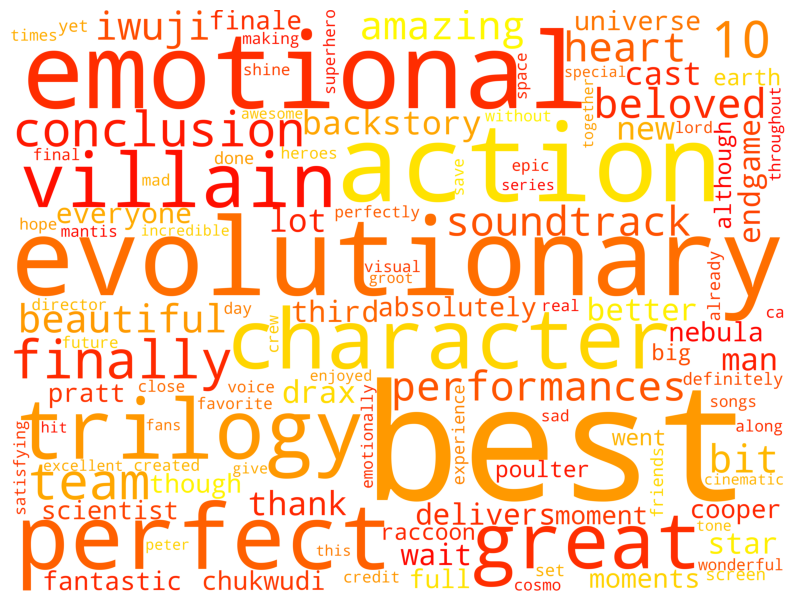

In [ ]:
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [ ]:
cloud = WordCloud(background_color ='white', colormap='autumn',
                      width = 4000, height = 3000, random_state = 43).generate_from_frequencies(dict(real_bad))#.generate_from_frequencies(dic)

# 생성된 WordCloud를 test.jpg로 보낸다.
cloud.to_file('bad.jpg')

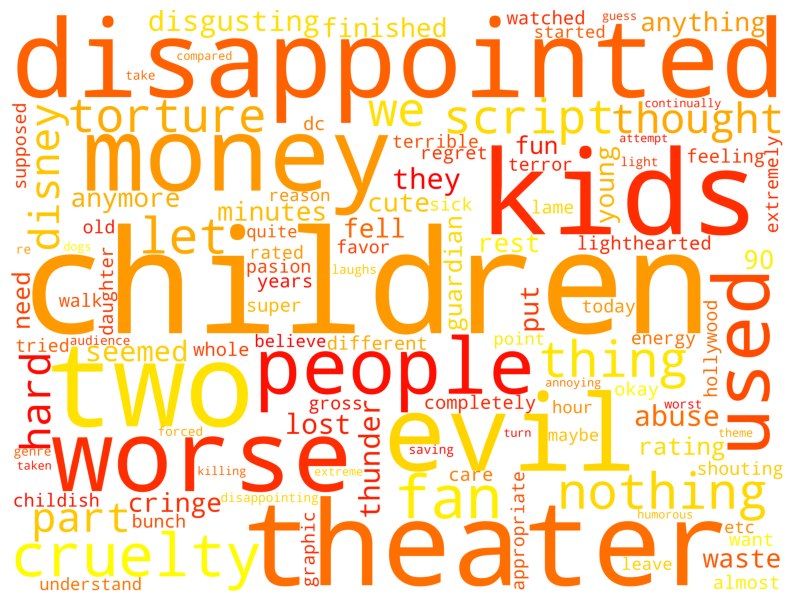

In [ ]:
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [ ]:
kor_real_good = []

for i in tqdm_notebook(range(len(real_good))):
    kor_real_good.append((translate_to_korean(real_good[i][0]), real_good[i][1]))

kor_real_good[:10]

/tmp/ipykernel_19434/2540777558.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(real_good))):


  0%|          | 0/112 [00:00<?, ?it/s]

[('최상의', 0.15084792145267023),
 ('진화', 0.10342023913774101),
 ('행동', 0.10301809269938456),
 ('감정적인', 0.09933887510297797),
 ('완벽한', 0.09565965750657138),
 ('성격', 0.080942787120945),
 ('삼부작', 0.080942787120945),
 ('엄청난', 0.06990513433172524),
 ('악당', 0.06622591673531865),
 ('마지막으로', 0.0620521434826446)]

In [ ]:
kor_real_bad = []

for i in tqdm_notebook(range(len(real_bad))):
    kor_real_bad.append((translate_to_korean(real_bad[i][0]), real_bad[i][1]))

kor_real_bad[:10]

/tmp/ipykernel_19434/2172110793.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(real_bad))):


  0%|          | 0/112 [00:00<?, ?it/s]

[('어린이들', 0.1218170161482602),
 ('극장', 0.07583958400305199),
 ('둘', 0.07583958400305199),
 ('어린이', 0.07583958400305199),
 ('실망한', 0.07042247085997684),
 ('사악한', 0.06852207158339636),
 ('돈', 0.0650053577169017),
 ('더 나쁜', 0.0609085080741301),
 ('사람들', 0.05958824457382656),
 ('사용된', 0.05958824457382656)]

In [ ]:
import pickle
# save
with open('kor_real_good.pickle', 'wb') as f:
    pickle.dump(kor_real_good, f, pickle.HIGHEST_PROTOCOL)

# save
with open('kor_real_bad.pickle', 'wb') as f:
    pickle.dump(kor_real_bad, f, pickle.HIGHEST_PROTOCOL)